In [39]:
import numpy as np
import pandas as pd
import missingno as msno
import warnings
import openpyxl
warnings.filterwarnings("ignore")

In [40]:
df = pd.read_excel("dataset.xlsx")

In [41]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,...,4167.779109,0.033611,0.404079,1,-0.000021,-0.000016,0.239311,-0.399947,0.494977,0.613714
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,...,937.137258,0.302949,1.033265,1,0.406404,0.190254,0.306376,-0.153149,0.356845,0.413727
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,...,197.222359,-0.712681,1.597605,1,-0.274656,-0.717490,0.114603,0.068012,-0.185253,0.320430
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,...,2393.654227,-0.000341,0.058888,0,-0.141411,0.503204,0.314256,0.545572,-0.831317,0.547668
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,...,4285.083772,-1.623271,-0.618951,0,-0.296158,-1.146507,0.603557,0.805945,-0.898512,0.513951


In [43]:
df.drop("UDI", axis=1, inplace=True)


In [44]:
df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,operational_hours,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
0,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,831,4167.779109,0.033611,0.404079,1,-0.000021,-0.000016,0.239311,-0.399947,0.494977,0.613714
1,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,4061,937.137258,0.302949,1.033265,1,0.406404,0.190254,0.306376,-0.153149,0.356845,0.413727
2,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,4801,197.222359,-0.712681,1.597605,1,-0.274656,-0.717490,0.114603,0.068012,-0.185253,0.320430
3,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,2604,2393.654227,-0.000341,0.058888,0,-0.141411,0.503204,0.314256,0.545572,-0.831317,0.547668
4,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,714,4285.083772,-1.623271,-0.618951,0,-0.296158,-1.146507,0.603557,0.805945,-0.898512,0.513951


In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],1000.0,297.500400,0.935754,295.300000,296.900000,297.600000,298.200000,299.100000
Process temperature [K],1000.0,308.344900,0.989815,305.700000,308.000000,308.500000,309.000000,310.200000
Rotational speed [rpm],1000.0,1539.511000,183.937840,1168.000000,1425.000000,1502.500000,1610.000000,2874.000000
Torque [Nm],1000.0,39.815900,9.705455,4.200000,33.475000,40.200000,46.300000,76.200000
Tool wear [min],1000.0,109.262000,63.837893,0.000000,54.750000,110.000000,164.000000,240.000000
Target,1000.0,0.023000,0.149978,0.000000,0.000000,0.000000,0.000000,1.000000
operational_hours,1000.0,2585.110000,1441.551468,111.000000,1314.000000,2531.000000,3903.750000,4995.000000
RUL,1000.0,2374.375754,1441.733272,-43.059499,1051.040702,2442.118062,3640.282612,4869.004338
Vibration (mm/s),1000.0,0.008222,1.002594,-1.731591,-0.877938,0.036091,0.880949,1.725342
Pressure (Pa),1000.0,-0.016327,1.008499,-1.724251,-0.933455,-0.042397,0.875624,1.714526


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               1000 non-null   object 
 1   Type                     1000 non-null   object 
 2   Air temperature [K]      1000 non-null   float64
 3   Process temperature [K]  1000 non-null   float64
 4   Rotational speed [rpm]   1000 non-null   int64  
 5   Torque [Nm]              1000 non-null   float64
 6   Tool wear [min]          1000 non-null   int64  
 7   Target                   1000 non-null   int64  
 8   Failure Type             1000 non-null   object 
 9   operational_hours        1000 non-null   int64  
 10  RUL                      1000 non-null   float64
 11  Vibration (mm/s)         1000 non-null   float64
 12  Pressure (Pa)            1000 non-null   float64
 13  Maintenance Required     1000 non-null   int64  
 14  Temp_Change              

In [47]:
df.columns

Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type', 'operational_hours', 'RUL', 'Vibration (mm/s)',
       'Pressure (Pa)', 'Maintenance Required', 'Temp_Change', 'Vib_Change',
       'Temperature_Mean', 'Vibration_Mean', 'Pressure_Mean', 'RPM_Mean'],
      dtype='object')

In [14]:
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
Type,35000,3,C,11712
Maintenance_Required,35000,2,Yes,26707
Failure_Type,35000,4,Non-Failure,25655


In [60]:
num_cols = ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]','Vibration (mm/s)','Pressure (Pa)','Vib_Change',
       'Temperature_Mean', 'Vibration_Mean', 'RPM_Mean']
cat_cols = ['Type', 'Failure type']
label = 'Failure Type'

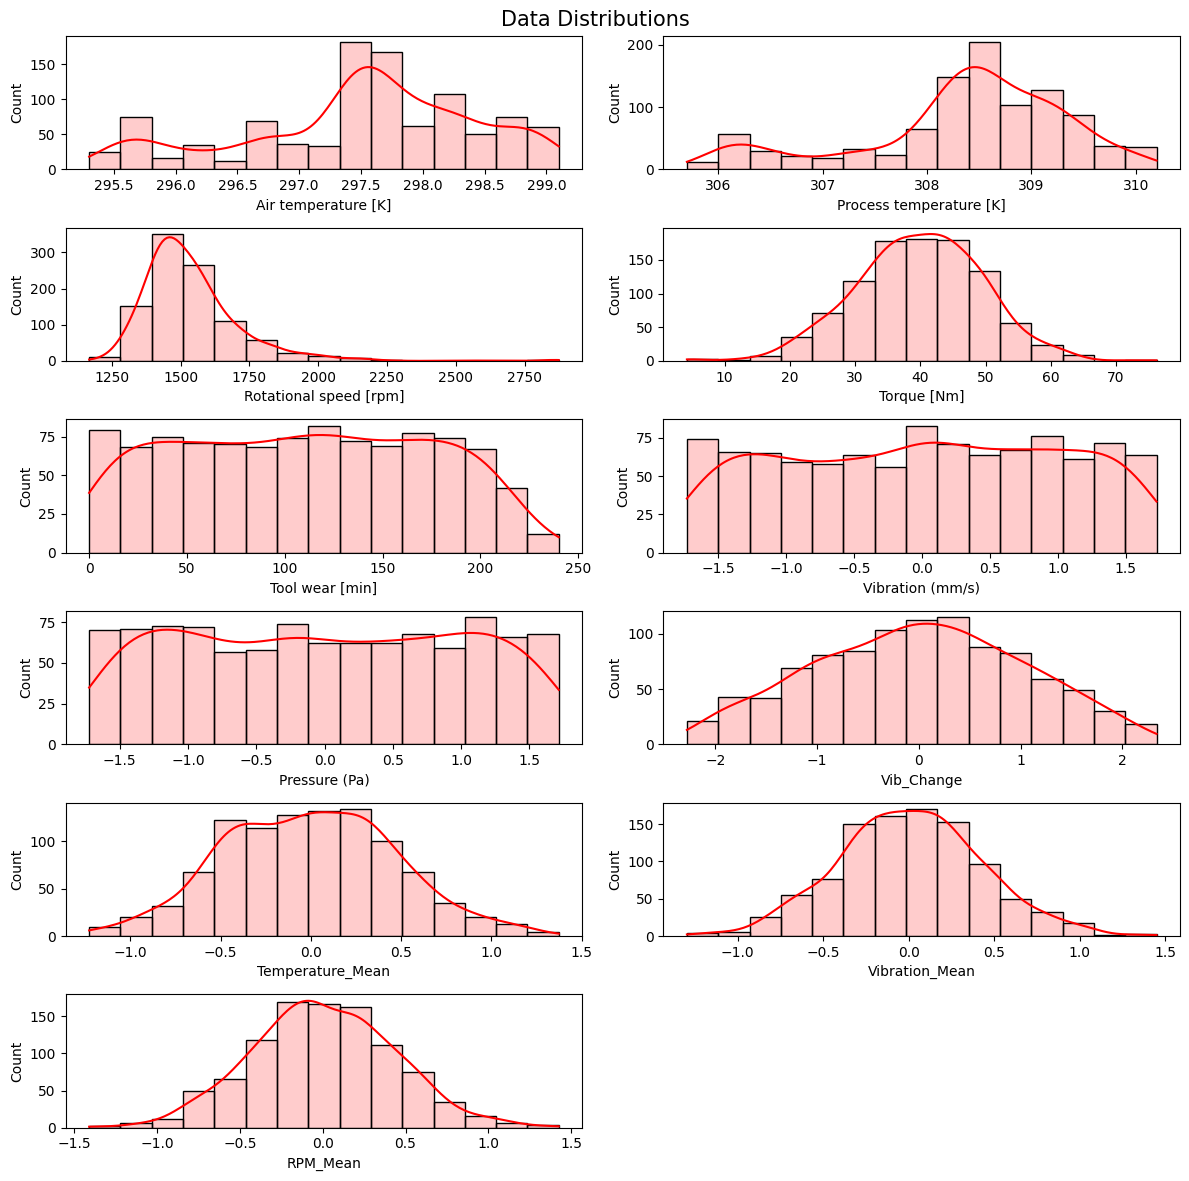

In [61]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize = (12, 12))
for i, col in enumerate(num_cols):
    plt.subplot(6,2, i+1)
    sns.histplot(df, x = col, kde = True, alpha = 0.2, color = 'red', bins = 15)
plt.suptitle("Data Distributions", fontsize = 15)
plt.tight_layout()
plt.show()

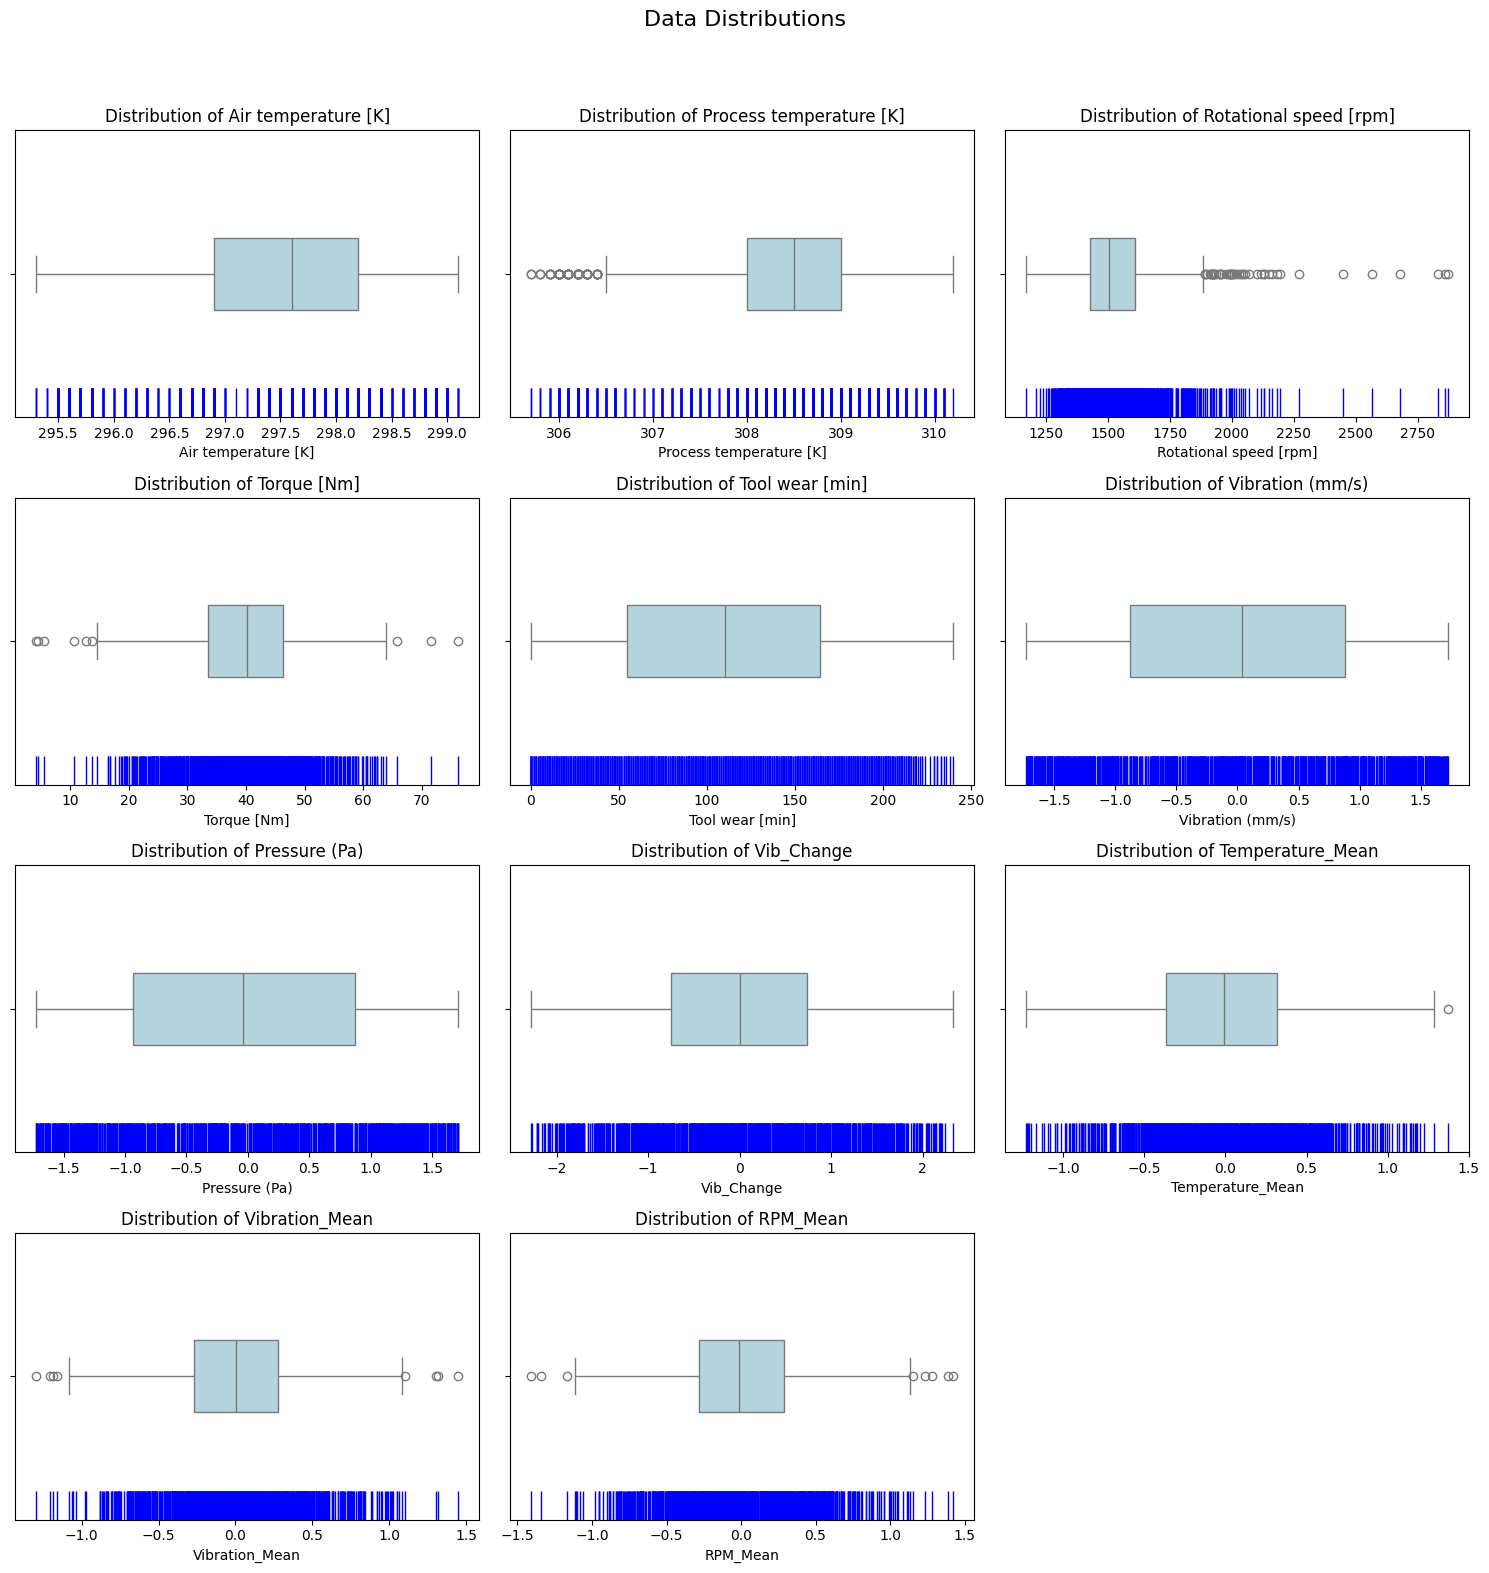

In [62]:
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols  
plt.figure(figsize=(15, 4 * n_rows))  
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.rugplot(data=df, x=col, height=0.1, color='blue')
    sns.boxplot(data=df, x=col, width=0.25, color='lightblue')
    plt.title(f'Distribution of {col}')

plt.suptitle("Data Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()


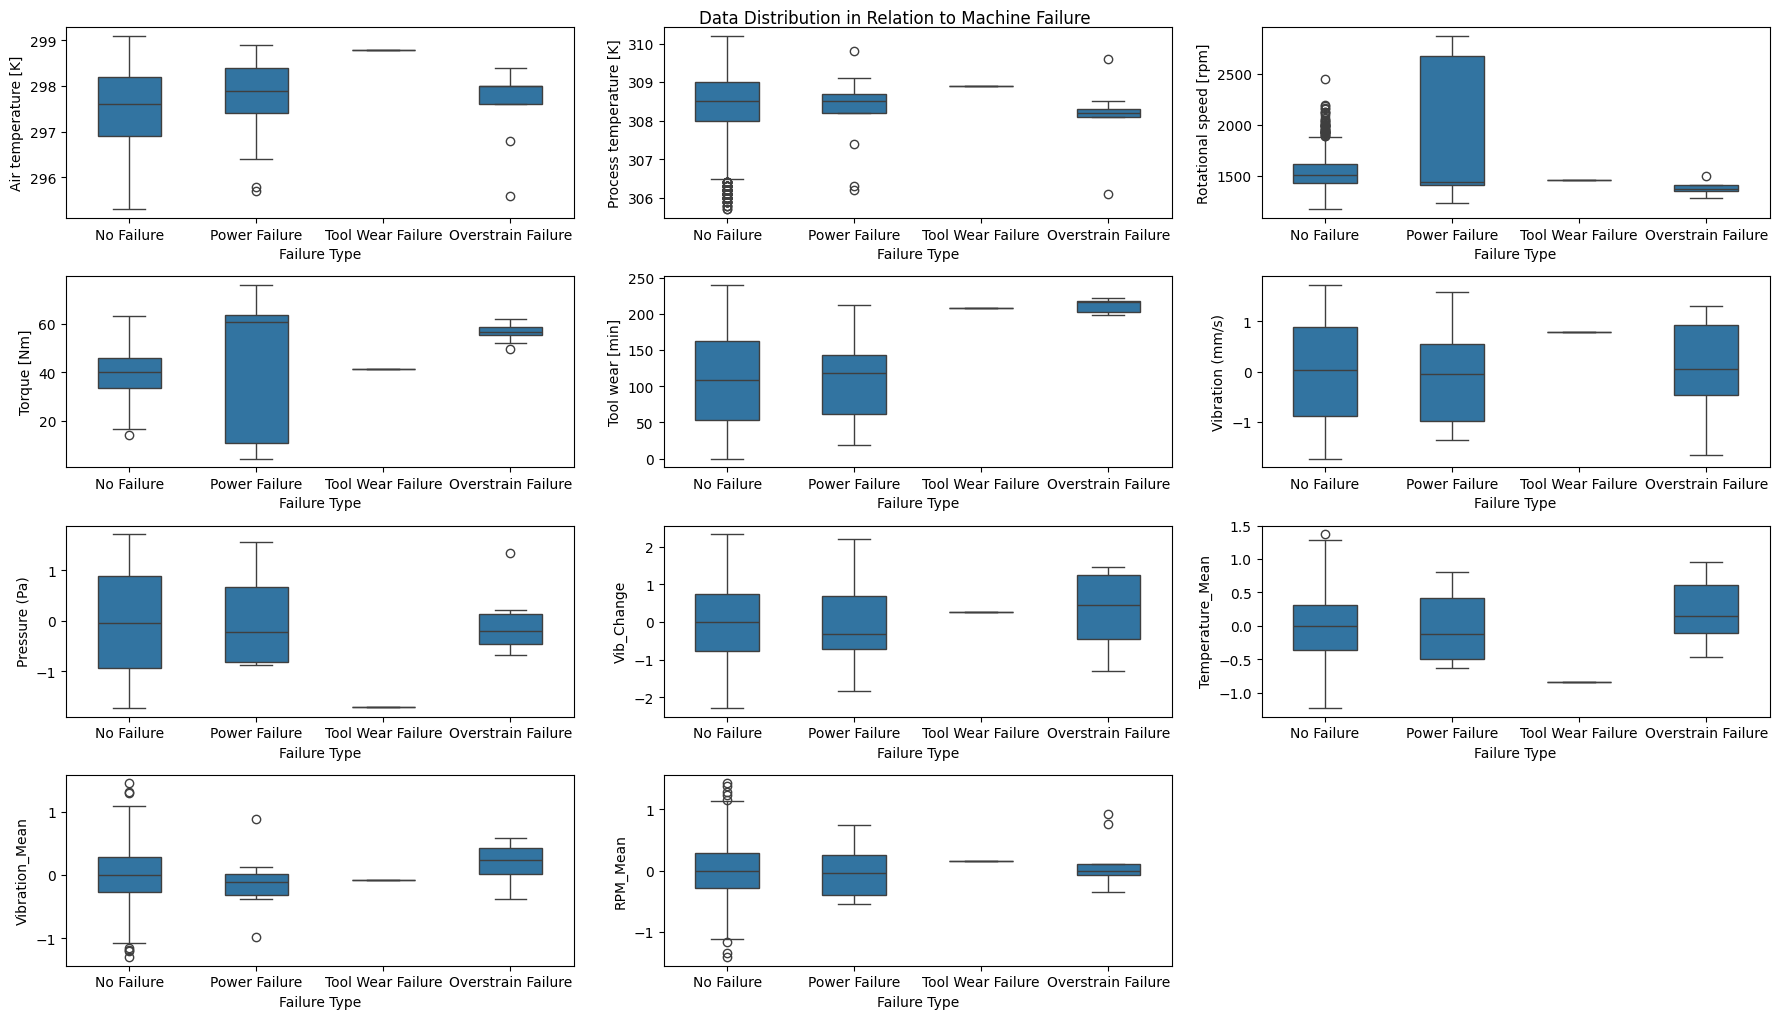

In [66]:
plt.figure(figsize = (18, 15))
for i, col in enumerate(num_cols):
    plt.subplot(6,3, i+1)
    sns.boxplot(df, x = label, y = col, width = 0.5)
plt.suptitle("Data Distribution in Relation to Machine Failure")
plt.tight_layout()
plt.show()

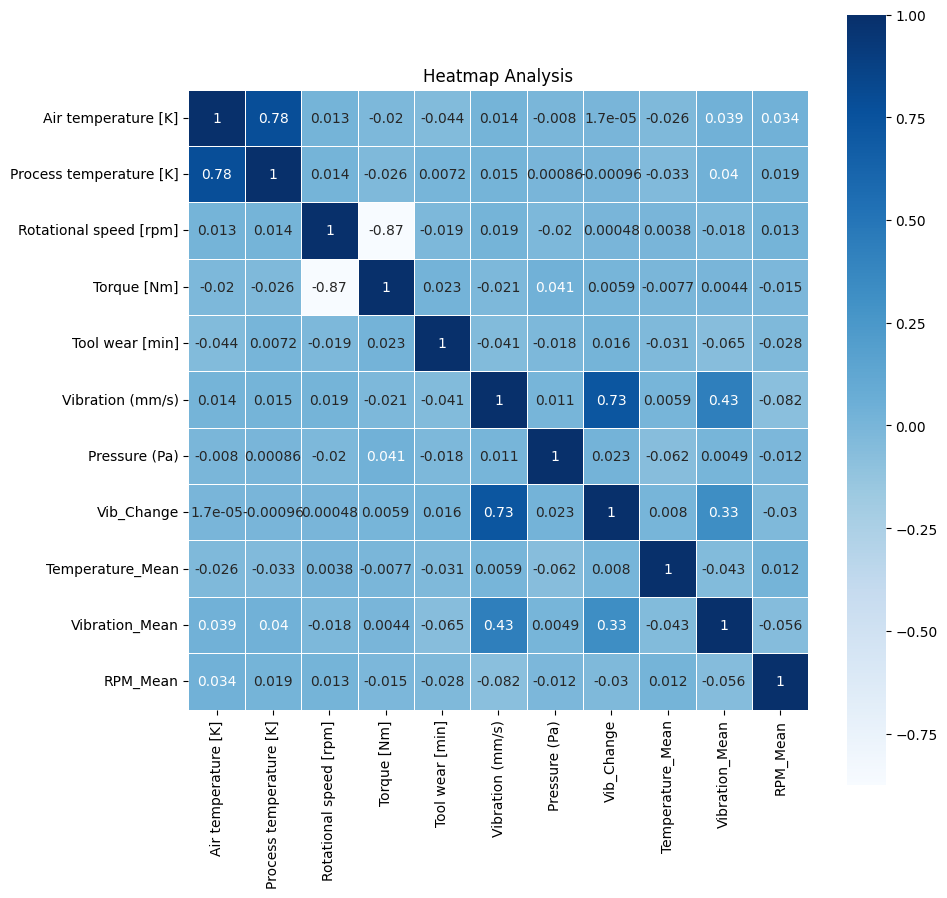

In [67]:
plt.figure(figsize = (10,10))
sns.heatmap(df[num_cols].corr(), square = True, annot = True, cmap = 'Blues', linewidths = 0.5)
plt.title("Heatmap Analysis")
plt.show()

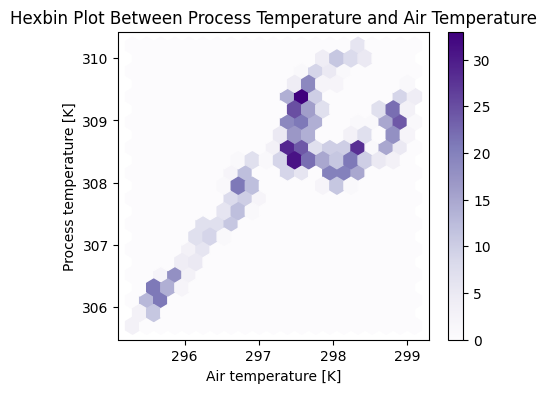

In [69]:
df.plot.hexbin(x='Air temperature [K]', y='Process temperature [K]', gridsize=20, cmap='Purples', figsize = (5,4))
plt.title("Hexbin Plot Between Process Temperature and Air Temperature")
plt.show()

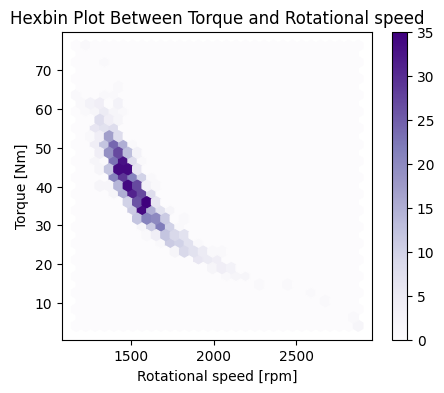

In [70]:
df.plot.hexbin(x='Rotational speed [rpm]',  y='Torque [Nm]', gridsize=30, cmap='Purples', figsize = (5,4))
plt.title("Hexbin Plot Between Torque and Rotational speed")
plt.show()

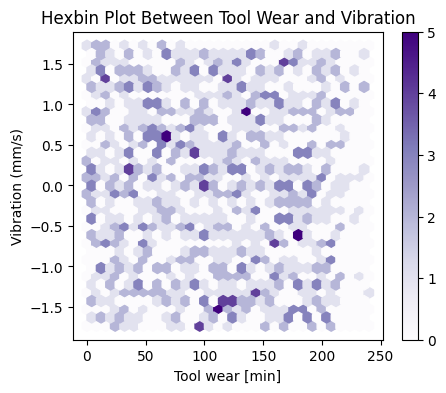

In [80]:
df.plot.hexbin(x='Tool wear [min]',  y='Vibration (mm/s)', gridsize=30, cmap='Purples', figsize = (5,4))
plt.title("Hexbin Plot Between Tool Wear and Vibration")
plt.show()

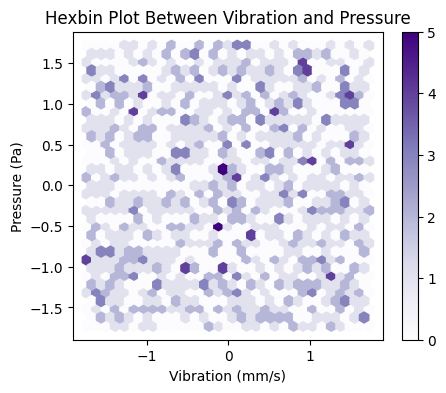

In [81]:
df.plot.hexbin(x='Vibration (mm/s)',  y='Pressure (Pa)', gridsize=30, cmap='Purples', figsize = (5,4))
plt.title("Hexbin Plot Between Vibration and Pressure")
plt.show()

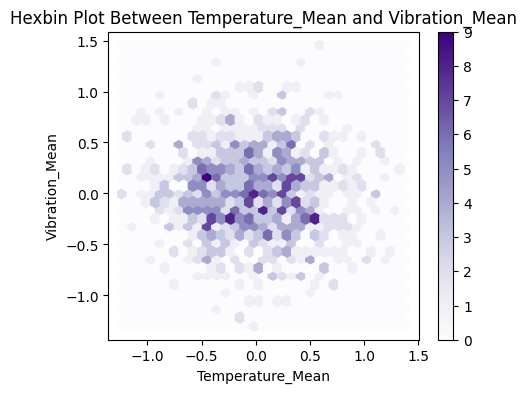

In [82]:
df.plot.hexbin(x='Temperature_Mean',  y='Vibration_Mean', gridsize=30, cmap='Purples', figsize = (5,4))
plt.title("Hexbin Plot Between Temperature_Mean and Vibration_Mean")
plt.show() 

In [74]:
type_machine_failure = df[['Type', 'Failure Type']].pivot_table(index = 'Type', columns='Failure Type', aggfunc= lambda x: len(x), margins = True)

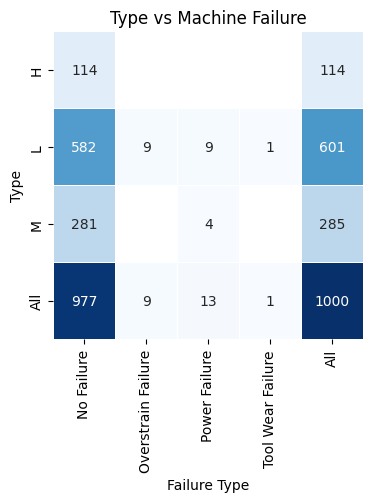

In [75]:
plt.figure(figsize=(4,4))
sns.heatmap(type_machine_failure, annot=True, fmt='g', cmap='Blues', cbar=False, linewidths=0.5)
plt.title("Type vs Machine Failure")
plt.show()

Exploratory Data Analysis and Data Preprocessing

In [83]:
df = pd.read_excel("dataset.xlsx")

In [84]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,...,4167.779109,0.033611,0.404079,1,-0.000021,-0.000016,0.239311,-0.399947,0.494977,0.613714
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,...,937.137258,0.302949,1.033265,1,0.406404,0.190254,0.306376,-0.153149,0.356845,0.413727
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,...,197.222359,-0.712681,1.597605,1,-0.274656,-0.717490,0.114603,0.068012,-0.185253,0.320430
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,...,2393.654227,-0.000341,0.058888,0,-0.141411,0.503204,0.314256,0.545572,-0.831317,0.547668
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,...,4285.083772,-1.623271,-0.618951,0,-0.296158,-1.146507,0.603557,0.805945,-0.898512,0.513951


In [85]:
df.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
995,996,L48175,L,296.3,307.3,1566,35.8,175,0,No Failure,...,3048.815969,-0.390407,0.917590,1,-1.561407,0.025871,-0.022168,0.405036,-0.203088,0.313502
996,997,M15856,M,296.3,307.2,1286,51.1,177,0,No Failure,...,3224.787052,0.882206,1.522131,0,1.019231,0.899000,0.319928,0.325986,-0.062195,0.306574
997,998,M15857,M,296.3,307.2,1446,45.9,180,0,No Failure,...,3507.269844,-0.148645,-0.523462,1,1.034484,-0.728243,-0.028837,0.332931,-0.165604,0.162472
998,999,M15858,M,296.4,307.2,2071,19.4,183,0,No Failure,...,1029.669913,0.932776,-1.719928,1,-1.733841,0.763935,-0.348400,0.164388,0.076292,-0.478597
999,1000,L48179,L,296.3,307.1,1560,33.2,186,0,No Failure,...,2583.997492,0.749252,-1.211771,0,1.095566,-0.129663,-0.016722,0.087470,0.115902,-0.548339


In [90]:
df=pd.read_excel('dataset.xlsx',header=None) 
df.head
features=df.loc[0,:]
print(features)

0                         UDI
1                  Product ID
2                        Type
3         Air temperature [K]
4     Process temperature [K]
5      Rotational speed [rpm]
6                 Torque [Nm]
7             Tool wear [min]
8                      Target
9                Failure Type
10          operational_hours
11                        RUL
12           Vibration (mm/s)
13              Pressure (Pa)
14       Maintenance Required
15                Temp_Change
16                 Vib_Change
17           Temperature_Mean
18             Vibration_Mean
19              Pressure_Mean
20                   RPM_Mean
Name: 0, dtype: object


Data shape, Data types and NaN values

In [92]:
#shape of the dataset
df.shape

(1001, 21)

In [93]:
#dtypes check the data types of our features
#Attribute in Dataframe to check the type of each column in the Dataframe
df.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
dtype: object

In [94]:
#Get detailed information about the Dataframe about the type
#and null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1001 non-null   object
 1   1       1001 non-null   object
 2   2       1001 non-null   object
 3   3       1001 non-null   object
 4   4       1001 non-null   object
 5   5       1001 non-null   object
 6   6       1001 non-null   object
 7   7       1001 non-null   object
 8   8       1001 non-null   object
 9   9       1001 non-null   object
 10  10      1001 non-null   object
 11  11      1001 non-null   object
 12  12      1001 non-null   object
 13  13      1001 non-null   object
 14  14      1001 non-null   object
 15  15      1001 non-null   object
 16  16      1001 non-null   object
 17  17      1001 non-null   object
 18  18      1001 non-null   object
 19  19      1001 non-null   object
 20  20      1001 non-null   object
dtypes: object(21)
memory usage: 164.4+ KB


In [95]:
#Checking the total null values in our features
df.notnull().sum()

0     1001
1     1001
2     1001
3     1001
4     1001
5     1001
6     1001
7     1001
8     1001
9     1001
10    1001
11    1001
12    1001
13    1001
14    1001
15    1001
16    1001
17    1001
18    1001
19    1001
20    1001
dtype: int64

In [96]:
df.isnull()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
999,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [97]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64

In [98]:
df.describe().T

,count,unique,top,freq
0,1001,1001,UDI,1
1,1001,1001,Product ID,1
2,1001,4,L,601
3,1001.0,40.0,297.4,91.0
4,1001.0,47.0,308.6,74.0
5,1001,459,1419,8
6,1001.0,362.0,38.2,10.0
7,1001,230,0,12
8,1001,3,0,977
9,1001,5,No Failure,977


Index of the Columns

In [109]:
df.index

RangeIndex(start=0, stop=1001, step=1)

In [110]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20],
      dtype='int64')

After data cleaning and processing the final list is as follows

In [111]:
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
1,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,...,4167.779109,0.033611,0.404079,1,-0.000021,-0.000016,0.239311,-0.399947,0.494977,0.613714
2,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,...,937.137258,0.302949,1.033265,1,0.406404,0.190254,0.306376,-0.153149,0.356845,0.413727
3,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,...,197.222359,-0.712681,1.597605,1,-0.274656,-0.71749,0.114603,0.068012,-0.185253,0.32043
4,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,...,2393.654227,-0.000341,0.058888,0,-0.141411,0.503204,0.314256,0.545572,-0.831317,0.547668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996,L48175,L,296.3,307.3,1566,35.8,175,0,No Failure,...,3048.815969,-0.390407,0.91759,1,-1.561407,0.025871,-0.022168,0.405036,-0.203088,0.313502
997,997,M15856,M,296.3,307.2,1286,51.1,177,0,No Failure,...,3224.787052,0.882206,1.522131,0,1.019231,0.899,0.319928,0.325986,-0.062195,0.306574
998,998,M15857,M,296.3,307.2,1446,45.9,180,0,No Failure,...,3507.269844,-0.148645,-0.523462,1,1.034484,-0.728243,-0.028837,0.332931,-0.165604,0.162472
999,999,M15858,M,296.4,307.2,2071,19.4,183,0,No Failure,...,1029.669913,0.932776,-1.719928,1,-1.733841,0.763935,-0.3484,0.164388,0.076292,-0.478597


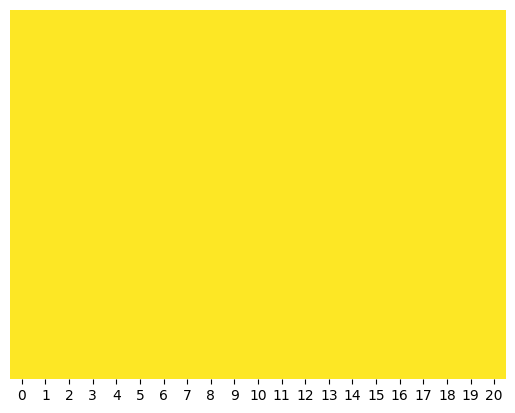

In [112]:
#visualizing the null values in the dataset using a heatmap
#visualization helps to find the distribution of null values in the data
sns.heatmap(df.isnull(),cbar=False, yticklabels=False, cmap='viridis_r')
plt.show()

In [119]:
df1 = pd.read_excel("dataset.xlsx")

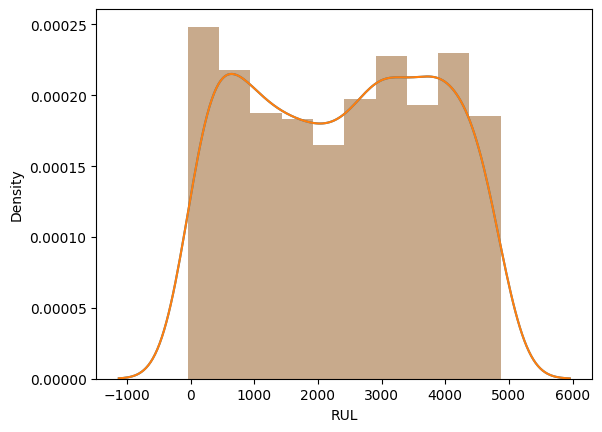

In [123]:
#let's check the distribution of Price feature
# Why we do this?  This distribution should be retained after filling the missing values
sns.distplot(df1['RUL'], kde=True)
sns.distplot(df1['RUL'], hist = True)
plt.show()


In [124]:
#checking the distribution of Price and Rating after imputation
df['operational_hours'] = df1['RUL'].fillna(df1['RUL'].mean())
df['operational_hours'] = df1['RUL'].fillna(25)
#using DataFrame's plot function
df.head() 

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,operational_hours
0,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean,4167.779109
1,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,...,0.033611,0.404079,1,-0.000021,-0.000016,0.239311,-0.399947,0.494977,0.613714,937.137258
2,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,...,0.302949,1.033265,1,0.406404,0.190254,0.306376,-0.153149,0.356845,0.413727,197.222359
3,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,...,-0.712681,1.597605,1,-0.274656,-0.71749,0.114603,0.068012,-0.185253,0.32043,2393.654227
4,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,...,-0.000341,0.058888,0,-0.141411,0.503204,0.314256,0.545572,-0.831317,0.547668,4285.083772


In [130]:
df1['Maintenance Required'].value_counts()

Maintenance Required
0    503
1    497
Name: count, dtype: int64

In [134]:
#we can either impute Embarked feature with mode value as it is categorical variable or
# we can drop the rows where there is missing values as it is very less . For now we will use mode 
df1.fillna('NA',inplace=True)
df1.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,...,4167.779109,0.033611,0.404079,1,-0.000021,-0.000016,0.239311,-0.399947,0.494977,0.613714
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,...,937.137258,0.302949,1.033265,1,0.406404,0.190254,0.306376,-0.153149,0.356845,0.413727
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,...,197.222359,-0.712681,1.597605,1,-0.274656,-0.717490,0.114603,0.068012,-0.185253,0.320430
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,...,2393.654227,-0.000341,0.058888,0,-0.141411,0.503204,0.314256,0.545572,-0.831317,0.547668
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,...,4285.083772,-1.623271,-0.618951,0,-0.296158,-1.146507,0.603557,0.805945,-0.898512,0.513951


Treating outliers

In [135]:
#making the copy of data to showcase how to drop outlier values
df2=df1.copy()

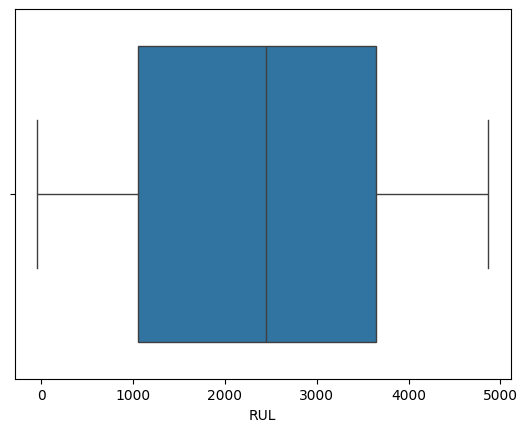

In [137]:
# Boxplot helps to identify the outliers in any feature
#outliers in Rating
#sns.boxplot(df['Rating'])
sns.boxplot(x='RUL', data=df2)
plt.show()

In [141]:
numeric_df2 = df2.select_dtypes(include=['number'])

# Calculating IQR (Inter-Quartile Range) for numeric columns only
Q1 = numeric_df2.quantile(0.25)  # Lower quartile
Q3 = numeric_df2.quantile(0.75)  # Upper quartile
IQR = Q3 - Q1                    # Inter-Quartile Range

print(IQR)

UDI                         499.500000
Air temperature [K]           1.300000
Process temperature [K]       1.000000
Rotational speed [rpm]      185.000000
Torque [Nm]                  12.825000
Tool wear [min]             109.250000
Target                        0.000000
operational_hours          2589.750000
RUL                        2589.241910
Vibration (mm/s)              1.758888
Pressure (Pa)                 1.809080
Maintenance Required          1.000000
Temp_Change                   1.405335
Vib_Change                    1.493993
Temperature_Mean              0.684461
Vibration_Mean                0.545182
Pressure_Mean                 0.654650
RPM_Mean                      0.568903
dtype: float64


In [143]:
# Calculate outlier bounds for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df2_filtered = numeric_df2[(numeric_df2 >= lower_bound) & (numeric_df2 <= upper_bound)].dropna()

# Display the shape of the filtered DataFrame
print("Original shape:", df2.shape)
print("Filtered shape:", df2_filtered.shape)

Original shape: (1000, 21)
Filtered shape: (842, 18)


Treating Outliers

In [144]:
Q3 = df2['RUL'].quantile(0.75)
Q1 = df2['RUL'].quantile(0.25)
#IQR=data['Price'].quantile(0.75)-data['Price'].quantile(0.25)
IQR=Q3-Q1
print(IQR)

2589.24190975


In [145]:
lower_bridge=Q1-(IQR*1.5)
upper_bridge=Q3+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-2832.822162125
7524.145476875


In [147]:
df2[df2.RUL>=3200]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,...,4167.779109,0.033611,0.404079,1,-0.000021,-0.000016,0.239311,-0.399947,0.494977,0.613714
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,...,4285.083772,-1.623271,-0.618951,0,-0.296158,-1.146507,0.603557,0.805945,-0.898512,0.513951
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure,...,3307.410677,1.301523,-0.277087,0,0.175592,-0.263934,0.515959,0.020799,-0.229460,0.229904
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure,...,3282.465782,1.592567,0.023596,0,-1.417390,0.205587,0.489662,-0.209331,-0.435341,-0.367288
10,11,H29424,H,298.4,308.9,1782,23.9,24,0,No Failure,...,3998.219365,-1.363115,-1.553024,0,0.997338,-2.088007,0.273847,-0.245427,-0.481540,-0.831001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,988,M15847,M,296.3,307.1,1534,33.8,151,0,No Failure,...,3291.625990,-1.695483,1.508422,1,-0.097368,-0.592878,-0.231316,-0.223342,-0.044560,-0.322487
990,991,L48170,L,296.2,307.0,1414,48.3,162,0,No Failure,...,3636.222968,-0.432962,-1.267252,0,-1.854245,-0.939853,-0.470173,0.125826,-0.394982,0.161086
991,992,M15851,M,296.1,307.0,1523,42.0,164,0,No Failure,...,4693.908293,-0.029252,0.792885,1,0.758858,0.285179,-0.411104,0.134337,0.041986,0.378625
996,997,M15856,M,296.3,307.2,1286,51.1,177,0,No Failure,...,3224.787052,0.882206,1.522131,0,1.019231,0.899000,0.319928,0.325986,-0.062195,0.306574


In [148]:
df2[(df2.RUL>=1500) & (df2.RUL<=3200)]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,...,2393.654227,-0.000341,0.058888,0,-0.141411,0.503204,0.314256,0.545572,-0.831317,0.547668
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure,...,3177.235519,1.408758,-1.677227,0,-0.508874,0.099705,0.676519,0.922970,-1.023291,0.718558
14,15,L47194,L,298.6,309.2,2035,19.6,40,0,No Failure,...,2738.403990,1.412085,-0.207396,0,-2.087548,0.890947,-0.483384,-0.058830,-0.749256,0.216048
15,16,L47195,L,298.6,309.2,1542,48.4,42,0,No Failure,...,2464.962193,0.971588,-0.111577,1,0.039292,-0.311198,0.068563,-0.138066,-0.979851,0.380472
18,19,H29432,H,298.8,309.2,1306,54.5,50,0,No Failure,...,1639.657411,-1.552834,-1.378253,0,-0.133063,-0.196853,0.966135,-0.214140,-0.688761,0.002205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,986,L48165,L,296.4,307.2,1748,25.3,144,0,No Failure,...,1724.218688,0.653919,0.222316,0,-1.050274,0.762804,0.481050,-0.171365,-0.133690,-0.470746
988,989,H30402,H,296.3,307.1,1774,25.9,154,0,No Failure,...,1891.618639,0.143552,-0.683946,1,-1.514919,1.299139,-0.648857,0.413636,-0.631233,-0.103101
989,990,M15849,M,296.2,307.0,2119,18.3,159,0,No Failure,...,2453.748154,0.897435,-0.572911,0,1.361576,0.532552,-0.446428,0.390723,-0.594085,0.412803
995,996,L48175,L,296.3,307.3,1566,35.8,175,0,No Failure,...,3048.815969,-0.390407,0.917590,1,-1.561407,0.025871,-0.022168,0.405036,-0.203088,0.313502


In [149]:
df2[(df2.RUL<=1500)]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,...,937.137258,0.302949,1.033265,1,0.406404,0.190254,0.306376,-0.153149,0.356845,0.413727
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,...,197.222359,-0.712681,1.597605,1,-0.274656,-0.717490,0.114603,0.068012,-0.185253,0.320430
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure,...,1092.711130,1.267597,-0.286580,0,0.542867,2.042189,0.575777,1.449112,-0.770002,0.563833
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure,...,126.650001,1.675116,-1.632714,0,1.109468,0.188148,0.739596,0.546857,-0.730790,0.609096
12,13,M14872,M,298.6,309.1,1339,51.1,34,0,No Failure,...,246.702139,-0.955173,0.873939,1,0.095615,-0.341483,-0.564303,0.345717,-0.236519,-0.543720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,987,H30400,H,296.4,307.1,1638,32.5,146,0,No Failure,...,496.112903,-0.856250,-1.142331,0,0.931839,-1.066849,0.149326,-0.388742,-0.431604,-0.406084
992,993,L48172,L,296.1,307.1,1651,35.7,167,0,No Failure,...,475.894520,1.489405,-1.424942,0,-0.227842,1.072814,-0.278403,0.316628,0.187835,0.162010
993,994,M15853,M,296.1,307.1,1485,36.0,169,0,No Failure,...,1148.080410,0.028990,-0.498204,0,0.677359,-1.031701,0.211279,-0.010982,0.368131,0.529193
994,995,M15854,M,296.2,307.2,1168,63.4,172,0,No Failure,...,1011.682500,-0.427052,0.422601,0,0.561801,-0.322179,0.019082,0.169775,0.123786,0.010056


Analyse the relation between target variables and the categorical variables in the dataset


The categorical variables considered are operational_hours and RUL

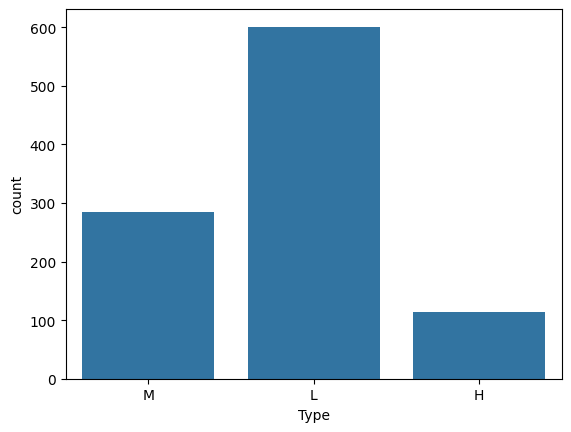

In [159]:
# Number of operational_hours in the dataset using plot
# Tells how operational_hours is distributed over the dataset
sns.countplot(x='Type', data=df2)
plt.show()

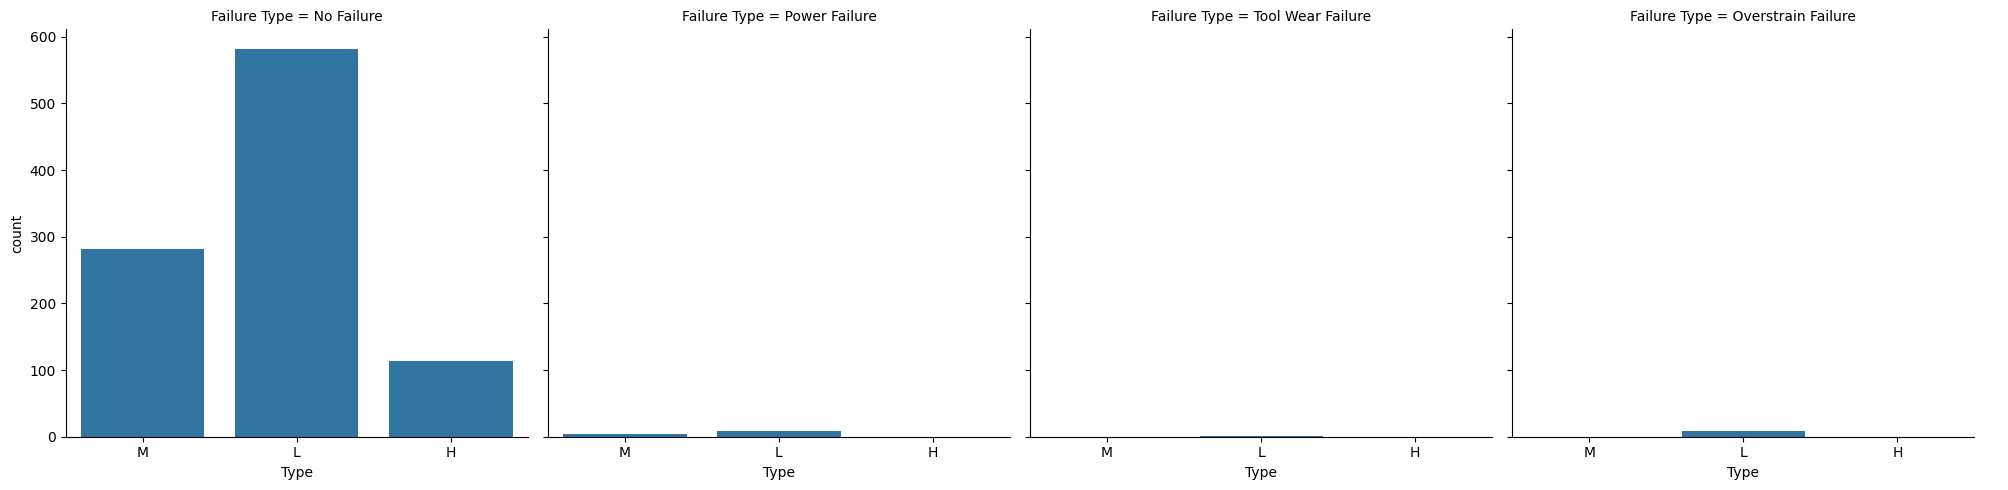

In [162]:
sns.catplot(x='Type', col='Failure Type', kind='count', data=df2)   #factor plot()
plt.show()

Final Conclusion

In [163]:
data = df2[~(df2.isnull())]
data.drop
print(data[~(data.isnull())])

      UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0       1     M14860    M                298.1                    308.6   
1       2     L47181    L                298.2                    308.7   
2       3     L47182    L                298.1                    308.5   
3       4     L47183    L                298.2                    308.6   
4       5     L47184    L                298.2                    308.7   
..    ...        ...  ...                  ...                      ...   
995   996     L48175    L                296.3                    307.3   
996   997     M15856    M                296.3                    307.2   
997   998     M15857    M                296.3                    307.2   
998   999     M15858    M                296.4                    307.2   
999  1000     L48179    L                296.3                    307.1   

     Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                      1551   

In [165]:
# Save cleaned and processed data to a CSV file
df2.to_csv('final_dataset.csv', index=False)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


ModuleNotFoundError: No module named 'pandas'

In [ ]:
file_path = 'final_dataset.csv'  
data = pd.read_csv(file_path)

In [ ]:
data = data.select_dtypes(include=[float, int])  
data = data.fillna(data.median())  

In [ ]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
# Apply Isolation Forest for anomaly detection
model = IsolationForest(contamination=0.01)  # Adjust contamination according to your needs
model.fit(scaled_data)

In [ ]:
# Predict anomalies
anomalies = model.predict(scaled_data)
data['Anomaly'] = anomalies

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))

# Plotting normal points
normal_data = data[data['Anomaly'] == 1]
plt.scatter(normal_data.iloc[:, 0], normal_data.iloc[:, 1], c='blue', label='Normal', s=50)

# Plotting anomalies
anomalies_data = data[data['Anomaly'] == -1]
plt.scatter(anomalies_data.iloc[:, 0], anomalies_data.iloc[:, 1], c='red', label='Anomaly', s=50)

plt.title('Anomaly Detection')
plt.xlabel('Feature 1')  # Replace with actual feature names
plt.ylabel('Feature 2')  # Replace with actual feature names
plt.legend()
plt.show()

In [ ]:
data.describe()

In [ ]:
from sklearn.svm import OneClassSVM

In [ ]:
# Initialize and fit the model
model = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.05)
model.fit(data)

# Predict anomalies
y_pred = model.predict(data)

In [ ]:
import numpy as np
anomaly_values=data.iloc[np.where(y_pred==-1)]
print(anomaly_values)

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


In [ ]:
# Load your dataset
file_path = 'final_dataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)

In [ ]:
# Preprocess the data
# Example: Drop non-numeric columns and fill missing values if necessary
data = data.select_dtypes(include=[float, int])  # Keep only numeric columns
data = data.fillna(data.median())  # Fill missing values

In [ ]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
# Apply Isolation Forest for anomaly detection
model = IsolationForest(contamination=0.01)  # Adjust contamination according to your needs
model.fit(scaled_data)

In [ ]:
# Predict anomalies
anomalies = model.predict(scaled_data)
data['Anomaly'] = anomalies

In [ ]:
# -1 for anomalies, 1 for normal points
print(data)

# Save the results to a new CSV file
output_file = 'C:/Users/manis/OneDrive/Desktop/HACKERA/results.csv'
data.to_csv(output_file, index=False)